# خوارزمية K-means

تجميع المبيعات باستخدام خوارزمية K-means

## استيراد المكتبات المطلوبة

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# تعيين نمط seaborn
sns.set_style('whitegrid')
# تعيين حجم الرسومات
plt.rcParams['figure.figsize'] = (12, 8)

## تحميل البيانات المعالجة

In [2]:
# تحميل البيانات المعالجة
df = pd.read_csv('../data/processed/sales_data_processed_20250122_052318.csv')
df.head()

,Order_Date,Category,Region,Segment,Sales,Quantity,Discount,Profit,Year,Month,Quarter,Sales_Category
0,2020-01-01,Technology,South,Consumer,366.800399,6,0.284533,9.524490,2020,1,1,Low
1,2020-01-02,Furniture,South,Home Office,556.867561,6,0.191294,37.407146,2020,1,1,Medium
2,2020-01-03,Technology,West,Home Office,212.152047,1,0.162915,125.708433,2020,1,1,Low
3,2020-01-04,Technology,East,Consumer,687.228360,5,0.118807,137.810135,2020,1,1,High
4,2020-01-05,Furniture,East,Home Office,147.447790,6,0.267729,-30.090084,2020,1,1,Low


## تحضير البيانات للتجميع

In [3]:
# تحديد المتغيرات للتجميع
features = ['Quantity', 'Sales', 'Discount', 'Profit']

# تطبيع البيانات
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
X = pd.DataFrame(X, columns=features)

## تحديد العدد الأمثل للمجموعات

d:\python\data_mining_project\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\python\data_mining_project\.venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\python\data_mining_project\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
d:\python\data_mining_project\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init

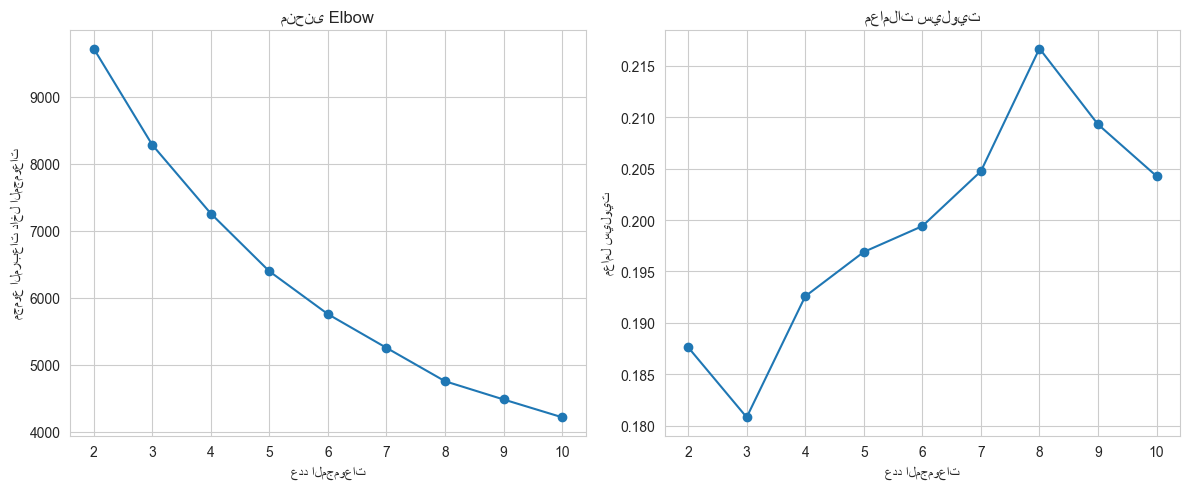

In [4]:
# حساب مجموع المربعات داخل المجموعات ومعامل سيلويت لعدة قيم من k
n_clusters_range = range(2, 11)
inertias = []
silhouette_scores = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# رسم منحنى Elbow
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(n_clusters_range, inertias, marker='o')
plt.xlabel('عدد المجموعات')
plt.ylabel('مجموع المربعات داخل المجموعات')
plt.title('منحنى Elbow')

# رسم معاملات سيلويت
plt.subplot(1, 2, 2)
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('عدد المجموعات')
plt.ylabel('معامل سيلويت')
plt.title('معاملات سيلويت')

plt.tight_layout()
plt.show()

## تطبيق خوارزمية K-means

In [5]:
# تنفيذ التجميع باستخدام العدد الأمثل للمجموعات
optimal_clusters = 3  # يمكن تغيير هذا الرقم بناءً على نتائج التحليل السابق
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# إضافة المراكز المطبعة إلى DataFrame
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=features
)

d:\python\data_mining_project\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## تحليل المجموعات

In [6]:
# إحصائيات المجموعات
print('توزيع المجموعات:')
print(df['Cluster'].value_counts())

print('\nمراكز المجموعات:')
print(cluster_centers)

توزيع المجموعات:
Cluster
1    1143
2     950
0     907
Name: count, dtype: int64

مراكز المجموعات:
   Quantity       Sales  Discount     Profit
0  6.747519  545.671296  0.118235  67.073312
1  2.364829  562.749564  0.241137  45.230565
2  6.593684  549.404809  0.388436  39.361901


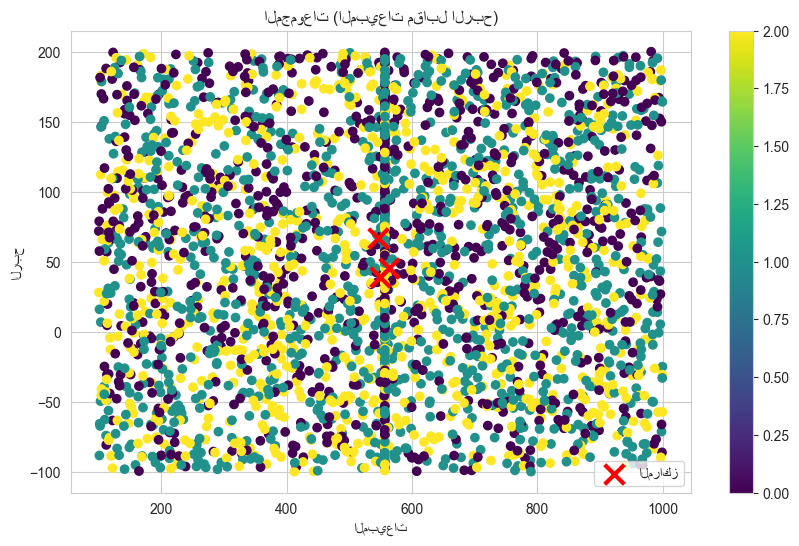

In [7]:
# رسم المجموعات (المبيعات مقابل الربح)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Sales'], df['Profit'], c=df['Cluster'], cmap='viridis')
plt.scatter(cluster_centers['Sales'], cluster_centers['Profit'],
            c='red', marker='x', s=200, linewidths=3, label='المراكز')
plt.xlabel('المبيعات')
plt.ylabel('الربح')
plt.title('المجموعات (المبيعات مقابل الربح)')
plt.colorbar(scatter)
plt.legend()
plt.show()

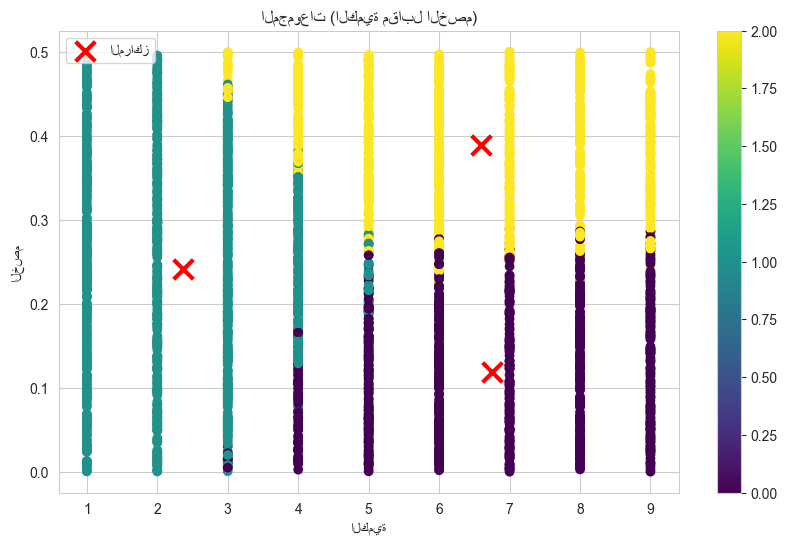

In [8]:
# رسم المجموعات (الكمية مقابل الخصم)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Quantity'], df['Discount'], c=df['Cluster'], cmap='viridis')
plt.scatter(cluster_centers['Quantity'], cluster_centers['Discount'],
            c='red', marker='x', s=200, linewidths=3, label='المراكز')
plt.xlabel('الكمية')
plt.ylabel('الخصم')
plt.title('المجموعات (الكمية مقابل الخصم)')
plt.colorbar(scatter)
plt.legend()
plt.show()

## تحليل خصائص المجموعات

In [9]:
# حساب متوسطات المتغيرات لكل مجموعة
cluster_means = df.groupby('Cluster')[features].mean()
print('متوسطات المتغيرات لكل مجموعة:')
print(cluster_means)

متوسطات المتغيرات لكل مجموعة:
         Quantity       Sales  Discount     Profit
Cluster                                           
0        6.754135  545.233434  0.118469  66.983149
1        2.363080  562.633112  0.240954  45.420254
2        6.589474  549.962963  0.388433  39.219757


<Figure size 1200x600 with 0 Axes>

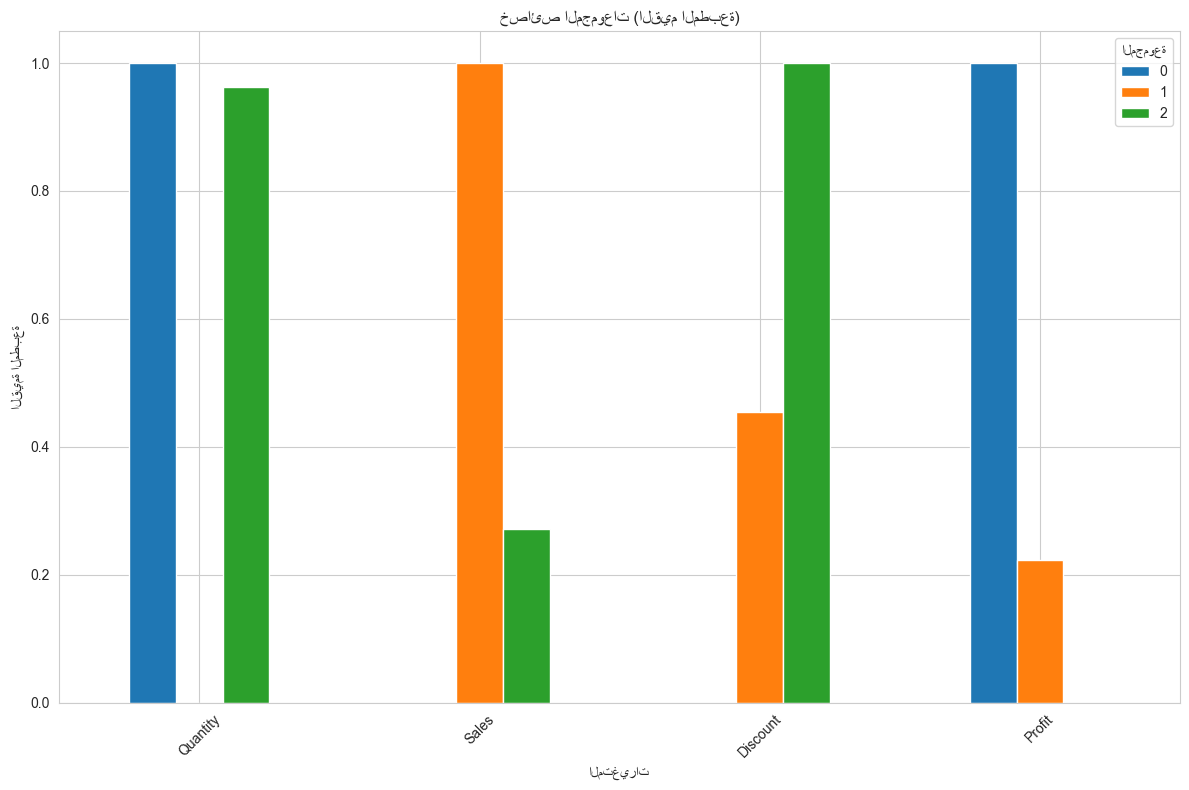

In [10]:
# رسم مخطط شريطي للمتوسطات
cluster_means_normalized = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

plt.figure(figsize=(12, 6))
cluster_means_normalized.T.plot(kind='bar')
plt.title('خصائص المجموعات (القيم المطبعة)')
plt.xlabel('المتغيرات')
plt.ylabel('القيمة المطبعة')
plt.legend(title='المجموعة')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()